In [1]:
import numpy as np
from scipy.stats import uniform, chi2
import matplotlib.pyplot as plt

In [2]:
nbins = 50

## カイ２乗分布に従う乱数を指数乱数から生成

### カイ２乗分布のパラメータ設定

In [3]:
df = 6
if df % 2 != 0:
    print("ERROR: 自由度は偶数のみ")
    exit(0)

In [4]:
nu = int(df/2)

## 逆変換法で一様乱数を指数乱数

In [6]:
np.random.seed()
N = 100000
rv = uniform(loc=0.0, scale=1.0)
U = rv.rvs(nu * N).reshape((nu, -1))
X = -np.log(1-U)

### 指数乱数からカイ２乗乱数を得る
### 各列を足し合わせて１つのカイ２乗乱数を得る

In [7]:
Y = 2 * np.sum(X, axis=0)

### 変換したカイ二乗分布の乱数とpdfの描画

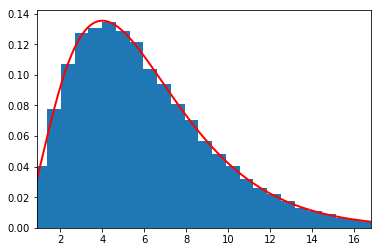

In [8]:
plt.figure(1)
plt.hist(Y, nbins, normed=True)
rv = chi2(df=df)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((rv.ppf(0.01), rv.ppf(0.99)))

plt.show()

## 指数乱数をガンマ乱数に変換

In [9]:
from scipy.stats import uniform, gamma

### ガンマ分布のパラメータ

In [10]:
k = 2.0
theta = 2.0

### 逆変換法で一様乱数を指数乱数に変換
### １つのガンマ乱数を得るためには、k個の指数乱数が必要なので行列化して和を取りやすくする

In [15]:
np.random.seed()
N = 100000
rv = uniform(loc=0.0, scale=1.0)
U = rv.rvs(k*N).reshape((k,-1))
X = - np.log(1-U)

/Users/hiroki-iida/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4894: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return self._random_state.uniform(0.0, 1.0, self._size)
/Users/hiroki-iida/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


### 指数乱数からガンマ乱数を得る
### 各列を足し合わせて１つのガンマ乱数を得る

In [16]:
Y = theta * np.sum(X, axis=0)

### 変換したガンマ分布の乱数とpdfを描画

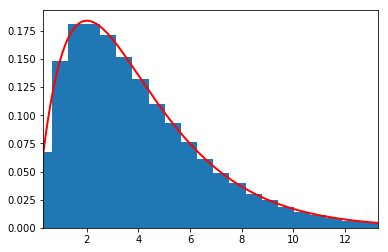

In [17]:
plt.figure(1)
plt.hist(Y, nbins, normed=True)
rv = gamma(a=k, scale=theta)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x,y, 'r-', lw=2)
plt.xlim((rv.ppf(0.01), rv.ppf(0.99)))

plt.show()

### 指数乱数をベータ乱数に変換

In [18]:
from scipy.stats import uniform, beta

### ベータ分布のパラメータ

In [19]:
a = 5.0
b = 1.0

### 逆変換法で一様乱数を指数乱数に変換
### １つのガンマ乱数を得るためにはk個の指数乱数が必要なので行列化して和を取りやすくする

In [21]:
np.random.seed()
N = 100000
rv = uniform(loc=0.0, scale=1.0)
U = rv.rvs((a+b)*N).reshape((a+b, -1))
X = -np.log(1-U)

/Users/hiroki-iida/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4894: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return self._random_state.uniform(0.0, 1.0, self._size)
/Users/hiroki-iida/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


### 指数乱数からベータ乱数を得る

In [22]:
Y = np.sum(X[0:a,], axis=0) / np.sum(X, axis=0)

/Users/hiroki-iida/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


### 変換したベータ分布の乱数とpdfを描画

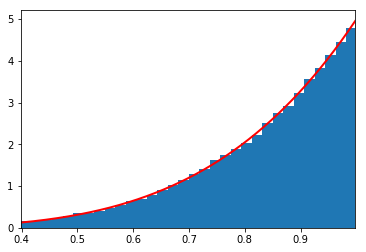

In [23]:
plt.figure(1)
plt.hist(Y, nbins, normed=True)
rv = beta(a=a, b=b)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x,y, 'r-', lw=2)
plt.xlim((rv.ppf(0.01), rv.ppf(0.99)))

plt.show()